<a href="https://colab.research.google.com/github/adijoy10/my_projects/blob/main/TaxiFare(project1_yhills).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model



In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [ ]:
### problem statement https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data

IN THE GIVEN PROBLEM,WE HAVE to PREDICT THE "AMOUNT" ,WHICH WILL BE OUR DEPENDENT VARIABLE.WE WILL USE POLYNOMIAL LINEAR REGRESSION ALGORTIHM,AS THE DV IS A NUMBER. AND ALSO DECESION TREE REGRESSOR

*   List item
*   List item



In [ ]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
17722,37:38.0,49.8,2012-05-07 19:37:38 UTC,-73.977699,40.753274,-73.776268,40.645694,1
48961,37:37.0,11.0,2014-04-25 00:37:37 UTC,-73.988327,40.723330,-74.006342,40.708598,3
21689,17:17.0,21.0,2015-05-15 02:17:17 UTC,-73.996002,40.737080,-73.988640,40.666088,5
7288,44:01.0,13.0,2013-05-21 19:44:01 UTC,-73.987203,40.760857,-74.008170,40.745485,1
907,02:07.0,7.0,2014-06-20 01:02:07 UTC,-73.995163,40.744714,-73.999739,40.728509,1
23750,55:00.0,4.9,2010-07-09 19:55:00 UTC,-73.982757,40.748293,-73.971882,40.763262,1
11391,05:51.0,6.5,2013-09-29 07:05:51 UTC,-74.013707,40.715157,-74.008279,40.702699,1
17366,26:58.0,8.0,2014-06-17 12:26:58 UTC,-73.980263,40.754900,-73.991409,40.750306,2
36125,24:00.0,18.5,2009-06-22 00:24:00 UTC,-73.997135,40.736782,-73.921645,40.776485,3
13023,54:12.0,6.5,2010-06-25 15:54:12 UTC,-73.988567,40.745328,-73.975036,40.756953,1


In [ ]:
df.shape

(50000, 8)

In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


SOME AMOUNT IS LESS THAN ZERO,WHICH IS NOT POSSIBLE,SO WE REMOVE AMOUNT LESS THAN ZERO

In [ ]:
df[df['amount']<=0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
2039,37:10.0,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,14:27.0,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
10002,26:01.0,0.0,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.713960,1
13032,57:10.0,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
27891,40:28.0,0.0,2015-05-15 21:40:28 UTC,-74.077927,40.805714,-74.077919,40.805721,1
28839,39:10.0,-2.5,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,19:45.0,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,29:46.0,-5.0,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
47302,13:39.0,0.0,2010-03-18 19:13:39 UTC,-73.942346,40.806269,-73.942463,40.806129,1


In [ ]:
df=df[df['amount']>0] ### rows with only data greator than zero are considered

<Axes: >

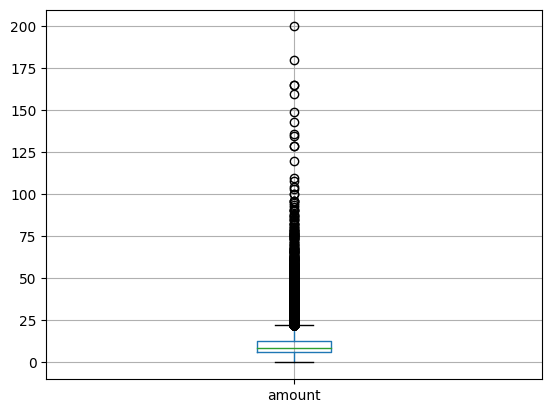

In [ ]:
df.boxplot(column='amount')

<Axes: >

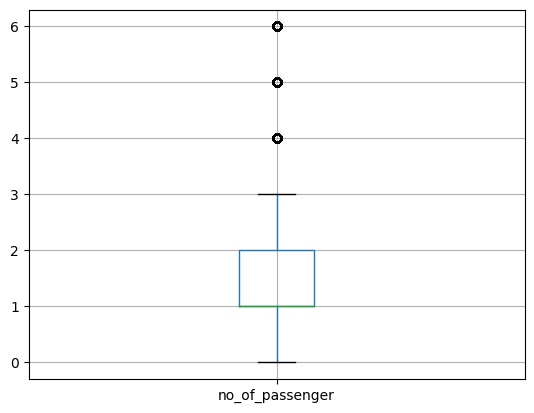

In [ ]:
df.boxplot(column='no_of_passenger')

In [ ]:
def NYC(df):
    boundary_filter = (df.longitude_of_pickup >= -75) & (df.longitude_of_pickup <= -73) & \
                      (df.latitude_of_pickup >= 40) & (df.latitude_of_pickup<= 42) & \
                      (df.longitude_of_dropoff >= -75) & (df.longitude_of_dropoff <= -73) & \
                      (df.latitude_of_dropoff >= 40) & (df.latitude_of_dropoff <= 42)
    df = df[boundary_filter]
    return df

HERE WE ARE SETTING THE BOUNDARY OF NEW YORK CITY,ONLY THE POINTS LYING INSIDE THE BOUNDARY WILL ONLY BE CONSIDERED

In [ ]:
df.shape

(49991, 8)

In [ ]:
print('Old size: %d' % len(df))
df=NYC(df)
print('New size: %d' % len(df))


Old size: 49991
New size: 48944


In [ ]:


def distance_between_pickup_dropoff(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    d = np.abs(dropoff_lat - pickup_lat) + np.abs(dropoff_long - pickup_long)
    return d


 calculating distance between pickup and drop off,using manhatten formula

In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
### seperating hour,minute,seconds of pickuptime
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], format= "%Y-%m-%d %H:%M:%S UTC")

# 2009-06-15 17:26:21 UTC
# add time information
df['year'] = df.date_time_of_pickup.apply(lambda t: t.year)
df['weekday'] = df.date_time_of_pickup.apply(lambda t: t.weekday())
df['hour'] = df.date_time_of_pickup.apply(lambda t: t.hour)



In [ ]:
df['actual_distance'] = distance_between_pickup_dropoff(df.latitude_of_pickup, df.longitude_of_pickup	,
                                                             df.latitude_of_dropoff	, df.longitude_of_dropoff)

In [ ]:
df.head(6)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,weekday,hour,actual_distance
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,0.027194
5,50:45.0,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,2011,3,9,0.054675


In [ ]:
df =df.drop(['unique_id', 'date_time_of_pickup'], axis=1) ### unique id not needed,so dropped
                                                                              ### date time seperated so dropped

In [ ]:
df.shape



(48944, 10)

In [ ]:
duplicate=df.duplicated()
duplicate.sum()   ###DUPLICATED DATA IS REMOVED

0

<Axes: >

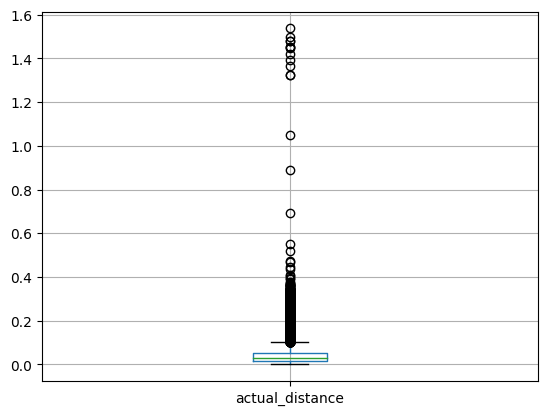

In [ ]:
df.boxplot(column='actual_distance')

In [ ]:
df = df[df.actual_distance > 0]

In [ ]:
def remove_outlier(col):
 sorted(col)
 Q1,Q3=col.quantile([0.25,0.75])
 IQR=Q3-Q1
 lower_range=Q1-1.5*IQR
 upper_range=Q3+1.5*IQR
 return lower_range,upper_range

In [ ]:
X=df.drop(['amount'],axis=1)
y=df[['amount']]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
model_1=LinearRegression()


In [ ]:
model_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
model_1.score(X_train,y_train)

0.6374093496784932

In [ ]:
model_1.score(X_test,y_test)

0.6835433780858727

In [ ]:
poly=PolynomialFeatures(degree=3,interaction_only=True)
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

In [ ]:
poly_clf=linear_model.LinearRegression()

HERE WE WILL USE POLYNOMIAL REGRESSION,AND WE GET BETTER RESULTS THAN LINEAR REGRESSION.

In [ ]:
poly_clf.fit(X_train2,y_train)

LinearRegression()

In [ ]:
print(poly_clf.score(X_train2,y_train))

0.7892315460486418


In [ ]:
print(poly_clf.score(X_test2,y_test))

0.7439528112747317


WE GET A SOCRE OF 78.9 FOR TRAIN DATA AND 74.9 USING TEST DATA,USING POLYNOMIAL LINEAR REGRESSION

In [ ]:
from sklearn.metrics import r2_score ###PREDICTING R2 SCORE

In [ ]:
y_test_mean=np.full(len(y_test),y_test.mean())

In [ ]:
y_test.mean()

amount    11.369406
dtype: float64

what R-SQUARED MEANS-COMPARE YOUR MODELS PREDICTION TO THE MEAN OF THE TARGETS.VALUE CAN RANGE FROM NEGATIVE INFINTY(A VERY POOR MODEL) TO 1.FOR EXAMPLE,IF MY MODEL PREDICTS THE MEAN OF TARGET,ITS R2 VALUE WOULD BE ZERO.AND IF YOUR MODEL PERFECTLY PREDICTS A RANGE OF NUMBERS,ITS R^2 SCORE WOULD BE 1.

In [ ]:
r2_score(y_test,y_test_mean)

0.0

In [ ]:
r2_score(y_test,y_test)

1.0

In [ ]:
from sklearn.metrics import mean_absolute_error
y_preds=model_1.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.6689855538978673

we get a mean abolute error of 2.66

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
predictions=model_1.predict(X_test)

In [ ]:
model_2=DecisionTreeRegressor()
model_2.fit(X_train,y_train)
print(model_2.score(X_train,y_train))

1.0


In [ ]:
print(model_2.score(X_test,y_test))

0.7052249024632175


In [ ]:
model_2=DecisionTreeRegressor(max_depth=7,criterion='friedman_mse')
model_2.fit(X_train,y_train)
print(model_2.score(X_train,y_train))
print(model_2.score(X_test,y_test))

0.8478588103896751
0.8013068758307367


for decesiontreeregressor algorith we get a socre of 84.7 for train data and  80.6 for test data.which is slightly better than the socre given by our linear regression model.

SUBITTED BY-ADITYA KUMAR SINHA
EMAIL ID-aditya.ei21@bmsce.ac.in